In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from data_preprocessing_final import *

In [3]:
#set columns
pd.set_option("display.max_columns",None)

#set rows
pd.set_option("display.max_rows",None)

In [4]:
df = pd.read_csv("./data/Ames_Housing_Price_Data.csv", index_col=0) #load df

In [5]:
df = cleaning(df) #calling the cleaning function from data_preprocessing_final

In [6]:
df.shape

(2578, 81)

In [7]:
factors,Y = dummify_func(df) # running dummifying function, returns factors and sales (dependent variable)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B39E7B850>]],
      dtype=object)

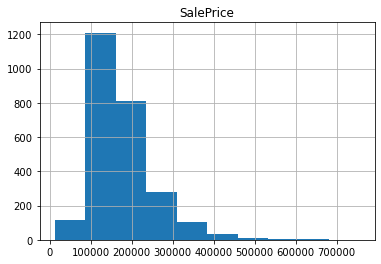

In [8]:
Y.hist()

In [9]:
Y = np.log(Y)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B3A665370>]],
      dtype=object)

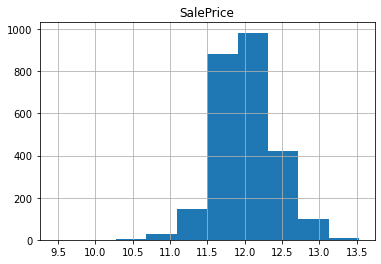

In [10]:
Y.hist()

In [11]:
# remove PID so we can run Ridge Regression
del factors['PID'] 

# Attempt on Ridge Regression
- create our train/test set 75/25
- Attempt 1 - without train/test data (alpha = 1)

In [12]:
# creating our test/train data
x_train, x_test, Y_train, Y_test = train_test_split(factors, Y, test_size=0.25, random_state=0)

In [13]:
ridge = Ridge()

### Attempt 1 - without train/test data (alpha = 1)

In [14]:
ridge.set_params(alpha=1, normalize=False)
ridge.fit(factors,Y)
ridge.score(factors,Y) #R-squared is 0.9322 with standard

0.9400611404659928

### Attempt 2 - with train/test data 
- selecting 1e-3 to 200 with 1000 #s as my alpha testing
- graphs to show coefficient and R2 against alpha

In [15]:
coefs = []
intercepts = []
train_R2  = []
test_R2 = []
alphaRange = np.linspace(1e-3,200,1000)
for alpha in alphaRange:
          ridge.set_params(alpha=alpha, normalize=False)  
          ridge.fit(x_train,Y_train)
          intercepts.append(ridge.intercept_)
          coefs.append(ridge.coef_)
          train_R2.append(ridge.score(x_train,Y_train))
          test_R2.append(ridge.score(x_test,Y_test))

In [16]:
# creating default graph settings
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (7,7)

Text(0.5, 1.0, 'Change of Ridge Intercept Varying Alpha')

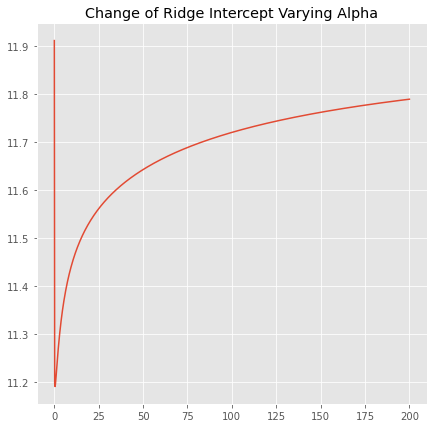

In [17]:
plt.plot(alphaRange, intercepts)
plt.title('Change of Ridge Intercept Varying Alpha')

# weird, i would expect the line to keep going toward 0

Text(0.5, 1.0, 'Change of $R^2$ Varying Alphas')

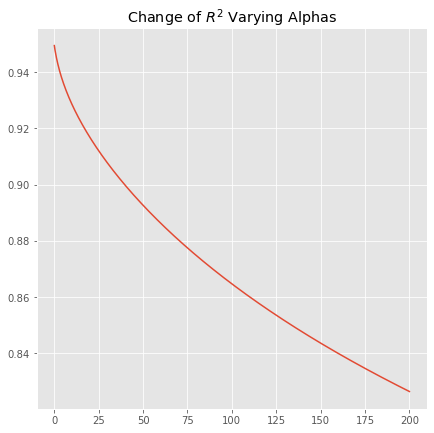

In [18]:
plt.plot(alphaRange, train_R2)
plt.title(r'Change of $R^2$ Varying Alphas')

# this seems to make sense R-squared goes down as alpha increases

### Trying to find optimal Alpha where train/test R2 converge
- print out list of coefficients to compare
- check our r-squared values for our train/test data after selecting an optimal alpha

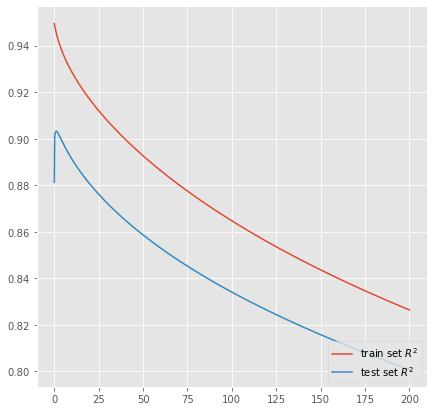

In [19]:
plt.plot(alphaRange, train_R2, label=r'train set $R^2$')
plt.plot(alphaRange, test_R2, label=r'test set $R^2$')
plt.legend(loc=4)

# no clear alpha

### List of Coefficients

In [20]:
ridge.set_params(alpha=5)
ridge.fit(factors, Y)
coefDF = pd.Series(ridge.coef_.reshape(-1,), index=factors.columns) #not sure why this wasn't working
print('The intercept is %.4f' %(ridge.intercept_))
print('The slopes are \n %s' %(coefDF))

The intercept is 11.2593
The slopes are 
 GrLivArea                   0.467781
LotArea                     0.158398
YearBuilt                   0.152491
YearRemodAdd                0.051098
1stFlrSF                    0.500428
2ndFlrSF                    0.152127
LowQualFinSF                0.001719
FullBath                    0.142530
HalfBath                    0.062391
BedroomAbvGr               -0.012812
KitchenAbvGr               -0.042810
TotRmsAbvGrd                0.124281
Fireplaces                  0.135158
WoodDeckSF                  0.072210
OpenPorchSF                 0.028545
EnclosedPorch               0.081570
3SsnPorch                   0.057180
ScreenPorch                 0.112971
PoolArea                   -0.003164
MSZoning_C (all)           -0.129114
MSZoning_FV                 0.028982
MSZoning_I (all)           -0.001126
MSZoning_RH                 0.038078
MSZoning_RL                 0.060639
MSZoning_RM                 0.017887
Street_Pave                -0.017

In [21]:
df_coef = pd.DataFrame(coefDF, columns = ['Coefficient'])

In [22]:
df_coef.sort_values(by=['Coefficient'])

,Coefficient
OverallQual_2,-0.252876
OverallCond_2,-0.152125
Condition2_PosN,-0.142910
MSZoning_C (all),-0.129114
OverallCond_3,-0.117428
Neighborhood_MeadowV,-0.102589
OverallQual_3,-0.099614
BldgType_Twnhs,-0.089339
MSSubClass_160,-0.082944
KitchenQual_Fa,-0.080568


In [23]:
# random guess and said alpha is optimal at 5

ridge.set_params(alpha=5)
ridge.fit(factors, Y)
print(ridge.get_params())
print("Train R-Squared:", ridge.score(x_train,Y_train))
print("Test R-Squared:", ridge.score(x_test,Y_test))

{'alpha': 5, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
Train R-Squared: 0.9350696828103184
Test R-Squared: 0.927385144402368


### Attempt 3 - using GridSearch 
- do the same as above but using GridSearch
- setting a different alphaRange for this one, 0.001 to 100 with 1000 numbers

In [24]:
alphaRange = np.linspace(0.001,100,1000)

#setting our params using alphaRange for our GridSearch
params = {'alpha': alphaRange, 'max_iter' : [1000000]}

In [25]:
#creating grid object
grid = GridSearchCV(ridge, params, scoring = 'r2')

#fitting it to our training data
grid.fit(x_train, Y_train)

GridSearchCV(estimator=Ridge(alpha=5),
             param_grid={'alpha': array([1.00000000e-03, 1.01099099e-01, 2.01198198e-01, 3.01297297e-01,
       4.01396396e-01, 5.01495495e-01, 6.01594595e-01, 7.01693694e-01,
       8.01792793e-01, 9.01891892e-01, 1.00199099e+00, 1.10209009e+00,
       1.20218919e+00, 1.30228829e+00, 1.40238739e+00, 1.50248649e+00,
       1.60258559e+00, 1.70268468e+00, 1.80278378e+00,...
       9.76977207e+01, 9.77978198e+01, 9.78979189e+01, 9.79980180e+01,
       9.80981171e+01, 9.81982162e+01, 9.82983153e+01, 9.83984144e+01,
       9.84985135e+01, 9.85986126e+01, 9.86987117e+01, 9.87988108e+01,
       9.88989099e+01, 9.89990090e+01, 9.90991081e+01, 9.91992072e+01,
       9.92993063e+01, 9.93994054e+01, 9.94995045e+01, 9.95996036e+01,
       9.96997027e+01, 9.97998018e+01, 9.98999009e+01, 1.00000000e+02]),
                         'max_iter': [1000000]},
             scoring='r2')

In [26]:
print(grid.best_params_) #2.103 is the best alpha according to gridSearch.. our graph did display a similiar result

{'alpha': 2.103081081081081, 'max_iter': 1000000}


In [27]:
# re-fitting our ridge using the new alpha

ridge.set_params(alpha=2.103081081081081)
ridge.fit(factors, Y)
print(ridge.get_params())
print("Train R-Squared:", ridge.score(x_train,Y_train))
print("Test R-Squared:", ridge.score(x_test,Y_test))

{'alpha': 2.103081081081081, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
Train R-Squared: 0.9397473158619217
Test R-Squared: 0.9325831063212567


# Attempt on Lasso Regression
- trying it with setting our alpharange manually
- then trying to see how it compares to GridSearch

In [28]:
#create our lasso object
lasso = Lasso()

In [29]:
coefs1 = []
intercepts1 = []
train_R2a  = []
test_R2a = []
alphaRange1 = np.linspace(1e-3,0.03,1000)
for alpha in alphaRange1:
          lasso.set_params(alpha=alpha, normalize=False)  
          lasso.fit(x_train,Y_train)
          intercepts1.append(lasso.intercept_)
          coefs1.append(lasso.coef_)
          train_R2a.append(lasso.score(x_train,Y_train))
          test_R2a.append(lasso.score(x_test,Y_test))

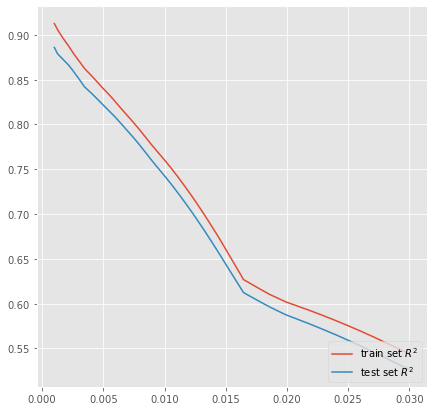

In [30]:
plt.plot(alphaRange1, train_R2a, label=r'train set $R^2$')
plt.plot(alphaRange1, test_R2a, label=r'test set $R^2$')
plt.legend(loc=4)

# can't really tell where Alpha is optimal, will use GridSearch

### GridSearch for Lasso

In [31]:
alphaRange1 = np.linspace(1e-3,0.05,1000)

#setting our params using alphaRange for our GridSearch
params1 = {'alpha': alphaRange1, 'max_iter' : [1000000]}

In [32]:
#creating grid object
grid1 = GridSearchCV(lasso, params1, scoring = 'r2')

#fitting it to our training data
grid1.fit(x_train, Y_train)

GridSearchCV(estimator=Lasso(alpha=0.03),
             param_grid={'alpha': array([0.001     , 0.00104905, 0.0010981 , 0.00114715, 0.0011962 ,
       0.00124525, 0.00129429, 0.00134334, 0.00139239, 0.00144144,
       0.00149049, 0.00153954, 0.00158859, 0.00163764, 0.00168669,
       0.00173574, 0.00178478, 0.00183383, 0.00188288, 0.00193193,
       0.00198098, 0.00203003, 0.00207908, 0.00212813, 0.00217718,
       0.00222623, 0.0...
       0.04857758, 0.04862663, 0.04867568, 0.04872472, 0.04877377,
       0.04882282, 0.04887187, 0.04892092, 0.04896997, 0.04901902,
       0.04906807, 0.04911712, 0.04916617, 0.04921522, 0.04926426,
       0.04931331, 0.04936236, 0.04941141, 0.04946046, 0.04950951,
       0.04955856, 0.04960761, 0.04965666, 0.04970571, 0.04975475,
       0.0498038 , 0.04985285, 0.0499019 , 0.04995095, 0.05      ]),
                         'max_iter': [1000000]},
             scoring='r2')

In [33]:
print(grid1.best_params_) #0.001 is the best alpha according to gridSearch.. hard to determine on the graph

{'alpha': 0.001, 'max_iter': 1000000}


In [34]:
# re-fitting our lasso using the new alpha

lasso.set_params(alpha=0.001)
lasso.fit(factors, Y)
print(lasso.get_params())
print("Train R-Squared:", lasso.score(x_train,Y_train))
print("Test R-Squared:", lasso.score(x_test,Y_test))

{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Train R-Squared: 0.9115550396253116
Test R-Squared: 0.9040213420581517


In [35]:
coefDF1 = pd.Series(lasso.coef_.reshape(-1,), index=factors.columns) #not sure why this wasn't working
print('The intercept is %.4f' %(lasso.intercept_))
print('The slopes are \n %s' %(coefDF1))

The intercept is 11.2020
The slopes are 
 GrLivArea                   1.203604e+00
LotArea                     0.000000e+00
YearBuilt                   1.249005e-01
YearRemodAdd                8.351338e-02
1stFlrSF                    2.784684e-01
2ndFlrSF                    0.000000e+00
LowQualFinSF               -0.000000e+00
FullBath                    0.000000e+00
HalfBath                    1.093085e-02
BedroomAbvGr               -0.000000e+00
KitchenAbvGr               -0.000000e+00
TotRmsAbvGrd                0.000000e+00
Fireplaces                  6.463196e-02
WoodDeckSF                  0.000000e+00
OpenPorchSF                 0.000000e+00
EnclosedPorch               0.000000e+00
3SsnPorch                   0.000000e+00
ScreenPorch                 3.697356e-02
PoolArea                    0.000000e+00
MSZoning_C (all)           -8.210968e-03
MSZoning_FV                 0.000000e+00
MSZoning_I (all)           -0.000000e+00
MSZoning_RH                 0.000000e+00
MSZoning_RL    

In [36]:
df_coef1 = pd.DataFrame(coefDF1, columns = ['Coefficient']).sort_values(by=['Coefficient'])
df_coef1

,Coefficient
OverallQual_2,-2.382280e-01
OverallCond_3,-1.487048e-01
BsmtExposure_No_Basement,-1.142634e-01
OverallQual_4,-9.718656e-02
OverallQual_3,-6.438308e-02
MSSubClass_30,-5.889486e-02
BldgType_Twnhs,-5.494322e-02
OverallCond_4,-4.857448e-02
MSSubClass_160,-4.657728e-02
KitchenQual_TA,-4.629471e-02


In [38]:
# let's all find all the 0 coefficients
print(df_coef1.shape)
print(df_coef1[df_coef1['Coefficient'] == 0].shape)
df_coef1[df_coef1['Coefficient'] == 0]

(331, 1)
(244, 1)


,Coefficient
FireplaceQu_Po,-0.0
FireplaceQu_TA,-0.0
GarageType_Basment,-0.0
GarageType_BuiltIn,-0.0
GarageType_CarPort,-0.0
GarageFinish_No_Garage,-0.0
GarageFinish_RFn,-0.0
Heating_GasW,0.0
GarageQual_Fa,-0.0
GarageQual_Gd,0.0


# Attempt on ElasticNet
- repeating analysis with ElasticNet
- using GridSearch

In [39]:
#create our lasso object
enet = ElasticNet()

### ElasticNet with GridSearch

In [73]:
#what we used previously
alphaSize = 200
rhoSize = 20
alphaRange2 = np.linspace(1e-3,100, alphaSize)
rhoRange = np.linspace(0.01, 1, rhoSize)


#setting our params using alphaRange for our GridSearch
params2 = {'alpha': alphaRange2, 'l1_ratio': rhoRange, 'max_iter' : [1000000]}

In [74]:
#creating grid object
grid2 = GridSearchCV(enet, params2, scoring = 'r2')

#fitting it to our training data
grid2.fit(x_train, Y_train)

GridSearchCV(estimator=ElasticNet(alpha=0.03, l1_ratio=1.0),
             param_grid={'alpha': array([1.00000000e-03, 5.03507538e-01, 1.00601508e+00, 1.50852261e+00,
       2.01103015e+00, 2.51353769e+00, 3.01604523e+00, 3.51855276e+00,
       4.02106030e+00, 4.52356784e+00, 5.02607538e+00, 5.52858291e+00,
       6.03109045e+00, 6.53359799e+00, 7.03610553e+00, 7.53861307e+00,
       8.04112060e+00, 8.5436281...
       0.41408163, 0.43428571, 0.4544898 , 0.47469388, 0.49489796,
       0.51510204, 0.53530612, 0.5555102 , 0.57571429, 0.59591837,
       0.61612245, 0.63632653, 0.65653061, 0.67673469, 0.69693878,
       0.71714286, 0.73734694, 0.75755102, 0.7777551 , 0.79795918,
       0.81816327, 0.83836735, 0.85857143, 0.87877551, 0.89897959,
       0.91918367, 0.93938776, 0.95959184, 0.97979592, 1.        ]),
                         'max_iter': [1000000]},
             scoring='r2')

In [75]:
print(grid2.best_params_) #0.001 is the best alpha with an l1_ratio of 0.13122448979591836

{'alpha': 0.001, 'l1_ratio': 0.13122448979591836, 'max_iter': 1000000}


In [76]:
# re-fitting our ElasticNet using the new alpha and rho

enet.set_params(alpha=0.001, l1_ratio=0.13122448979591836)
enet.fit(factors, Y)
print(enet.get_params())
print("Train R-Squared:", enet.score(x_train,Y_train))
print("Test R-Squared:", enet.score(x_test,Y_test))

{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.13122448979591836, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Train R-Squared: 0.9338404360830189
Test R-Squared: 0.9276798150122227
